Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 56s 638ms/step - accuracy: 0.5491 - loss: 0.7808 - val_accuracy: 0.7540 - val_loss: 0.5272
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 267ms/step - accuracy: 0.6944 - loss: 0.5887 - val_accuracy: 0.8610 - val_loss: 0.3975
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 246ms/step - accuracy: 0.8110 - loss: 0.4475 - val_accuracy: 0.9000 - val_loss: 0.3190
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 246ms/step - accuracy: 0.8192 - loss: 0.4127 - val_accuracy: 0.9160 - val_loss: 0.2702
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 243ms/step - accuracy: 0.8485 - loss: 0.3644 - val_accuracy: 0.9280 - val_loss: 0.2359
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 260ms/step - accuracy: 0.8710 - loss: 0.3131 - val_accuracy: 0.9380 - val_loss: 0.2116
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 244ms/step - accuracy: 0.8893 - loss: 0.2791 - val_accuracy: 0.9430 - val_loss: 0.1935
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 245ms/step - accuracy: 0.8936 - loss: 0.2694 - val_accu

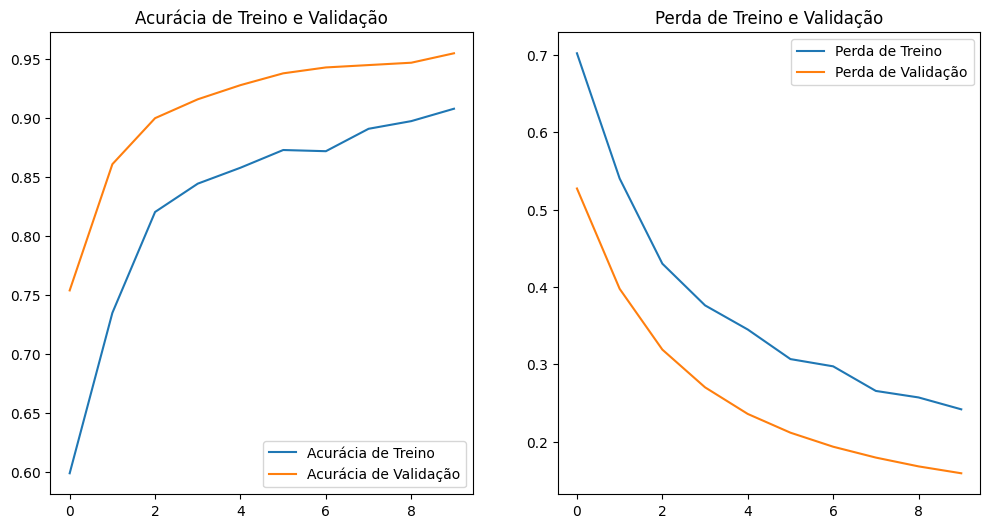

In [2]:
# ==============================================================================
# PROJETO DE TRANSFER LEARNING - DESAFIO DIO
# Classificador de Imagens (Gatos vs. Cachorros)
# ==============================================================================

# --- 1. IMPORTAÇÃO DAS BIBLIOTECAS ---
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile

# --- 2. PREPARAÇÃO DOS DADOS (VERSÃO CORRIGIDA) ---

import os
import zipfile

# Baixando o dataset de Gatos vs. Cachorros (sem extrair automaticamente)
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=False)

# Descompactando o arquivo .zip para o diretório /content/ do Colab
with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    zip_ref.extractall('/content')

# Definindo os caminhos para os diretórios que AGORA TEMOS CERTEZA que existem
base_dir = '/content/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


# ==========================================================
# SE VOCÊ FOR USAR SEU PRÓPRIO DATASET:
# 1. Faça o upload do seu arquivo .zip para o Colab
# 2. Descomente as linhas abaixo e ajuste os nomes dos diretórios
#
# !unzip -q seu_dataset.zip -d /content/
# train_dir = '/content/seu_dataset/treino'
# validation_dir = '/content/seu_dataset/validacao'
# ==========================================================

# Parâmetros do modelo e das imagens (isso continua igual)
IMG_SIZE = (160, 160)
BATCH_SIZE = 32

# --- 3. PRÉ-PROCESSAMENTO E DATA AUGMENTATION ---

# Criando geradores de imagem para escalar os pixels e aplicar data augmentation
# Data Augmentation é usado para aumentar a variedade do dataset de treino
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Carregando as imagens dos diretórios usando os geradores
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary' # Binário pois temos 2 classes
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# --- 4. CONSTRUÇÃO DO MODELO COM TRANSFER LEARNING ---

# Carregar o modelo base (MobileNetV2) pré-treinado no ImageNet
# include_top=False: remove a camada de classificação final do modelo original
# input_shape: define o tamanho das nossas imagens
base_model = MobileNetV2(input_shape=(160, 160, 3),
                         include_top=False,
                         weights='imagenet')

# Congelar as camadas do modelo base para não re-treiná-las
base_model.trainable = False

# Criar nosso novo modelo em cima do modelo base
model = Sequential([
    base_model,
    GlobalAveragePooling2D(), # Reduz a dimensionalidade
    Dropout(0.2),             # Camada de Dropout para evitar overfitting
    Dense(1, activation='sigmoid') # Camada de saída para classificação binária
])

# --- 5. COMPILAÇÃO DO MODELO ---
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Visualizar a arquitetura do modelo
model.summary()

# --- 6. TREINAMENTO DO MODELO ---
EPOCHS = 10
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

# --- 7. AVALIAÇÃO E VISUALIZAÇÃO DOS RESULTADOS ---
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treino')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treino e Validação')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treino')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda de Treino e Validação')

# Salve a figura para usar no seu README.md
plt.savefig('training_results.png')
plt.show()